In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import keras

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input


Loading VGG16 model

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.applications.vgg16 import VGG16
#from keras.preprocessing import image
#from tensorflow.keras.applications.vgg16 import preprocess_input
from skimage.segmentation import mark_boundaries
import keras.utils as image
from keras.utils import load_img,img_to_array,array_to_img
from matplotlib import cm

In [ ]:
import tensorflow as tf
#from tensorflow.keras.preprocessing import image
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import cv2

# Load the pre-split dataset
train_dir = '/content/drive/MyDrive/dataset6/chest_xray/train'
test_dir = '/content/drive/MyDrive/dataset6/chest_xray/test'
val_dir = '/content/drive/MyDrive/dataset6/chest_xray/val'

'''
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
'''
# Define constants
IMAGE_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 50


# Create data generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE, class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE, class_mode="binary"
)

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE, class_mode="binary"
)

# Build model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=x)

# Freeze VGG16 layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])

# Train model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
58889256/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
163/163 [==============================] - 1182s 7s/step - loss: 0.5712 - accuracy: 0.9523
Epoch 2/50
163/163 [==============================] - 75s 462ms/step - loss: 0.1150 - accuracy: 0.9831
Epoch 3/50
163/163 [==============================] - 81s 495ms/step - loss: 0.0862 - accuracy: 0.9852
Epoch 4/50
163/163 [==============================] - 76s 464ms/step - loss: 0.0536 - accuracy: 0.9912
Epoch 5/50
163/163 [==============================] - 77s 470ms/step - loss: 0.0310 - accuracy: 0.9939
Epoch 6/50
163/163 [==============================] - 74s 450ms/step - loss: 0.0349 - accuracy: 0.9946
Epoch 7/50
163/163 [==============================] - 74s 455ms/step - loss: 0.0421 - accuracy: 0.9939
Epoch 8/50
163/163 [==============================] - 75s 459ms/step - loss: 0.0129 - accuracy: 0.9973
Epoch 9/50
163/163 [==============================] - 74s 452ms/step - loss: 0.0303 - accuracy: 0.9935
Epoch 10/50
163/163 [==============================] - 77s 471ms/step - lo

In [ ]:
import tensorflow as tf
#from tensorflow.keras.preprocessing import image
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import cv2

# Load the pre-split dataset
train_dir = '/content/drive/MyDrive/dataset6/chest_xray/train'
test_dir = '/content/drive/MyDrive/dataset6/chest_xray/test'
val_dir = '/content/drive/MyDrive/dataset6/chest_xray/val'

'''
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
'''
# Define constants
IMAGE_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 50


# Create data generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE
)

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/IPD NOTES/grad_update.h5")

In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")

20/20 [==============================] - 7s 359ms/step - loss: 1.5033 - accuracy: 0.6410
Test accuracy: 0.64


In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")


20/20 [==============================] - 182s 10s/step - loss: 17.1898 - accuracy: 0.7692
Test accuracy: 0.77


In [ ]:
model.save("gradcam_om.h5")

In [ ]:
# Generate GradCAM heatmap
def generate_grad_cam(model, img_path):
    img = load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_tensor = img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    pred_class = np.argmax(model.predict(img_tensor))

    last_conv_layer = model.get_layer("block5_conv3")
    gradient_model = Model([model.inputs], [last_conv_layer.output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = gradient_model(img_tensor)
        loss = predictions[:, pred_class]

    grads = tape.gradient(loss, conv_output)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_output_value = conv_output[0]
    #heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    #heatmap = tf.squeeze(heatmap)
    #heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    heatmap = tf.reduce_mean(tf.multiply(conv_output_value, pooled_grads), axis=-1).numpy()
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    #heatmap = cv2.resize(heatmap, (IMAGE_SIZE, IMAGE_SIZE))
    #heatmap = cv2.applyColorMap(np.uint8(heatmap*255), cv2.COLORMAP_JET)
    #heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    #heatmap = cv2.GaussianBlur(heatmap, (15, 15), 0)

    return heatmap, img_tensor



1/1 [==============================] - 0s 76ms/step


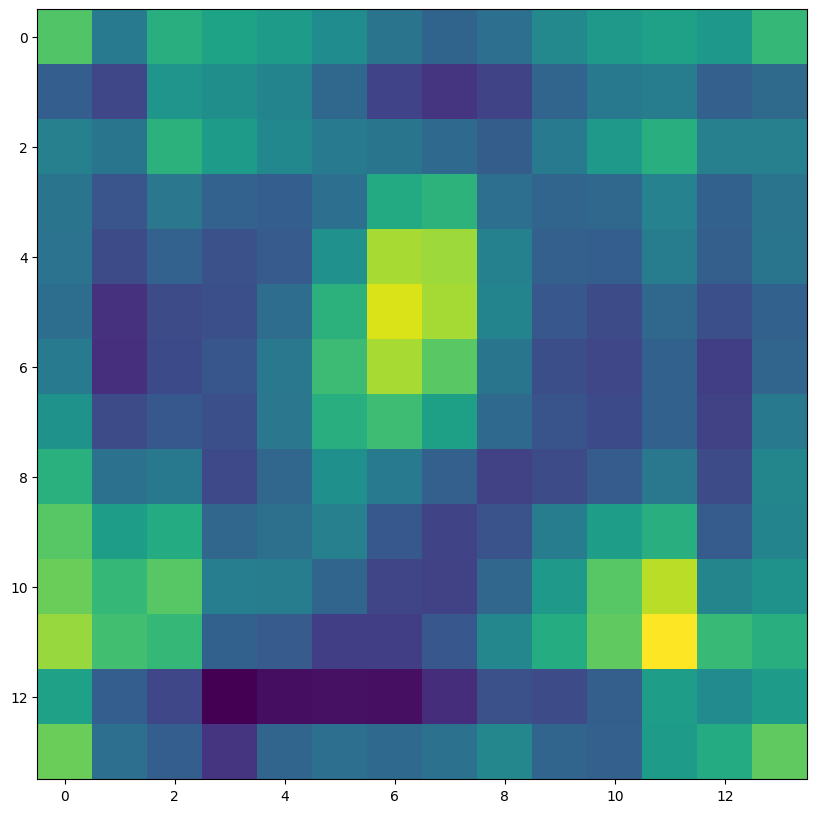

In [ ]:
# Generate GradCAM heatmaps for a few test images
img_path = "/content/normal.jpg"
# Loop through each image and generate GradCAM heatmap
# Path to input image

# Generate GradCAM heatmap
heatmap, img_tensor = generate_grad_cam(model, img_path)

# Print the heatmap
plt.imshow(heatmap)
plt.show()

In [ ]:
def superimpose(img, heatmap, alpha=0.5):
    img = np.uint8(255 * img)
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_RGB2BGR)
    superimposed_img = cv2.addWeighted(img, alpha, heatmap, 1 - alpha, 0)
    return superimposed_img


In [ ]:
img = load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
img_array = img_to_array(img)
#superimposed_img = superimpose(img_array, heatmap)
#plt.imshow(superimposed_img)
#plt.show()

In [ ]:
def predict_image(model, img_path):
    heatmap, img_tensor = generate_grad_cam(model, img_path)
    img = load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img = img_to_array(img)
    img /= 255.
    superimposed_img = superimpose(img[0], heatmap)

    pred = model.predict(img_tensor)
    if pred[0][0] > 0.5:
        print(f"The model is {round(pred[0][0]*100, 2)}% accurately sure that this is a case of pneumonia.")
    else:
        print(f"The model is {round((1-pred[0][0])*100, 2)}% accurately sure that this is not a case of pneumonia.")
    severity = round(100*np.mean(heatmap), 2)
    print(f"The severity of pneumonia in the image is {severity}%.")
    plt.imshow(superimposed_img)
    plt.show()


In [ ]:
def show_on_xray(img_path, heatmap):
  # We use cv2 to load the original image
  img = cv2.imread(img_path)

  # We resize the heatmap to have the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  # We convert the heatmap to RGB
  heatmap = np.uint8(255 * heatmap)

  # We apply the heatmap to the original image
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  # 0.4 here is a heatmap intensity factor
  superimposed_img = heatmap * 0.4 + img

  ## Save the image to disk
  cv2.imwrite('./xray_cam.jpg', superimposed_img)
  img_samp = cv2.imread('./xray_cam.jpg')  #OpenCV has BGR order
  img_samp = cv2.cvtColor(img_samp, cv2.COLOR_BGR2RGB)  #matplotlib has RGB order

  plt.imshow(img_samp)

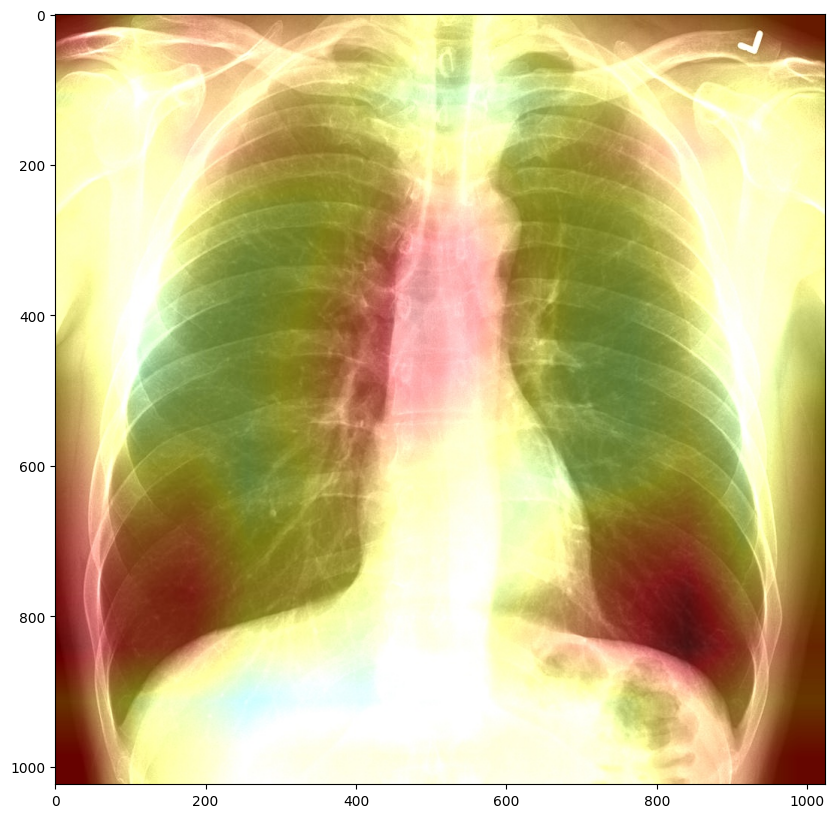

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)
show_on_xray("/content/normal.jpg", heatmap)

In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/IPD NOTES/gradcam_om.h5")